In [305]:
import numpy as np
import pandas as pd

In [306]:
data = pd.read_csv('RICE.csv')
#dados_filtrados = data[data['smoking_history'] != 'No Info']
#dados_filtrados = dados_filtrados.drop(columns=['diabetes'], axis=1)
dados_filtrados = data.dropna(how='any')
print(dados_filtrados.shape)

(19404, 14)


In [307]:
#Remove outliers, que são dados fora da realidade da amostra.
from scipy import stats
z = np.abs(stats.zscore(dados_filtrados._get_numeric_data()))
dados_filtrados = dados_filtrados[(z < 3).all(axis=1)]
print(dados_filtrados.shape)

(16800, 14)


In [308]:
dados_filtrados['Collection Type'].replace({'Number/Light trap': 0, 'Percentage': 1, 'Number/Pheromone trap': 2, 'Percent Damage': 3, 'Number/hill': 4},inplace = True)
dados_filtrados['Location'].replace({'Maruteru': 0, 'Rajendranagar': 1, 'Raipur': 2, 'Ludhiana': 3, 'Palampur': 4, 'Cuttack': 5},inplace = True)
dados_filtrados['PEST NAME'].replace({'Yellowstemborer': 0, 'Gallmidge': 1, 'Greenleafhopper': 2, 'LeafBlast': 3, 'Brownplanthopper': 4, 'LeafFolder': 5, 'Whitebackedplanthopper': 6, 'Miridbug': 7, 'Caseworm': 8, 'ZigZagleafhopper': 9, 'NeckBlast': 10},inplace = True)
#dados_filtrados['Collection Type'].value_counts()
#dados_filtrados['Location'].value_counts()
#dados_filtrados.info()
dados_filtrados['PEST NAME'].value_counts()

0.0     3881
1.0     2267
2.0     2061
4.0     1711
3.0     1643
5.0     1563
6.0     1112
7.0     1041
8.0      896
9.0      452
10.0     173
Name: PEST NAME, dtype: int64

In [309]:
# Escolhe as Colunas mais importantes
from sklearn.feature_selection import SelectKBest, chi2
X = dados_filtrados.loc[:,dados_filtrados.columns!='PEST NAME']
y = dados_filtrados[['PEST NAME']]
selector = SelectKBest(chi2, k=4)
selector.fit(X, y)
X_new = selector.transform(X)
print(X.columns[selector.get_support(indices=True)])

Index(['Pest Value', 'Collection Type', 'RH1(%)', 'RH2(%)'], dtype='object')


In [352]:
#DBSCAN
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt 
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import silhouette_score

In [348]:
#arvore de decisão
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size= 0.20, random_state=0)

clf_dt = DecisionTreeClassifier(random_state=0)
clf_dt.fit(X_train,y_train)
y_pred = clf_dt.predict(X_test)
score = accuracy_score(y_test,y_pred)
print('Accuracy :',score)

Accuracy : 0.3761904761904762


In [395]:
dbscan = DBSCAN(eps=0.5, min_samples=7)
x = np.array([dados_filtrados['Pest Value'].values, dados_filtrados['Collection Type'].values])
x = x.reshape(-1, 2)
x = StandardScaler().fit_transform(x) 
labels = dbscan.fit_predict(x)
labels
valor = np.unique(labels)
valor

array([-1,  0,  1,  2,  3,  4,  5,  6,  7])

In [396]:
def generate_colors(num_colors):
    colors = []
    for i in range(num_colors):
        color = '#' + ''.join(np.random.choice(list('0123456789ABCDEF'), size=6))
        colors.append(color)
    return colors

num_colors = 120  # Altere o número de cores desejado aqui
colors = np.array(generate_colors(num_colors))

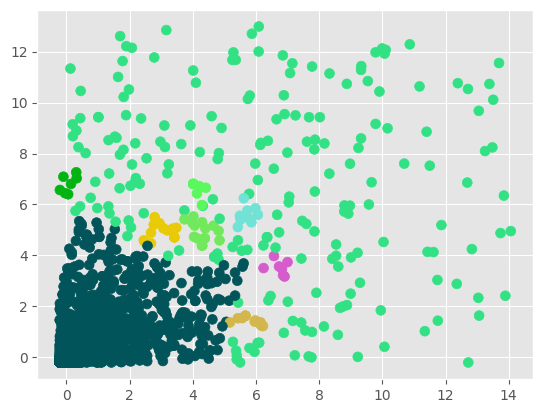

In [397]:
plt.scatter(x[:, 0], x[:, 1], c=colors[labels], s=50)
plt.savefig('dbscan.png', dpi=600)
plt.show()

In [398]:
silhouette_avg = silhouette_score(x, labels)
print("O Índice de Silhueta médio é:", silhouette_avg)

O Índice de Silhueta médio é: 0.9166141499678292
